In [5]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
data_path=r"/Users/yuwang/Desktop/Program/Course/菜菜的sklearn/Practice"

In [6]:
credit_data=pd.read_csv(data_path+r"/credit.csv")
credit_data.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [3]:
credit_data.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
credit_data.shape

(1000, 21)

In [13]:
credit_data.iloc[:,1:21].head()

,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,others,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [7]:
credit_data.iloc[:,0].value_counts()

0    700
1    300
Name: Default, dtype: int64

In [ ]:
#https://stackoverflow.com/questions/38108832/passing-categorical-data-to-sklearn-decision-tree
'''
As it stands, sklearn decision trees do not handle categorical data - see issue #5442.

The recommended approach of using Label Encoding converts to integers which the DecisionTreeClassifier() 
will treat as numeric. If your categorical data is not ordinal, this is not good - you'll end up with splits that do not make sense.

Using a OneHotEncoder is the only current valid way, allowing arbitrary splits not dependent on
the label ordering, but is computationally expensive.
'''

In [9]:
one_hot_data = pd.get_dummies(credit_data.iloc[:,1:21],drop_first=True)
one_hot_data.head()

,duration,amount,installment,residence,age,cards,liable,checkingstatus1_A12,checkingstatus1_A13,checkingstatus1_A14,...,property_A124,otherplans_A142,otherplans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,tele_A192,foreign_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [25]:
one_hot_data.columns

Index(['duration', 'amount', 'installment', 'residence', 'age', 'cards',
       'liable', 'checkingstatus1_A12', 'checkingstatus1_A13',
       'checkingstatus1_A14', 'history_A31', 'history_A32', 'history_A33',
       'history_A34', 'purpose_A41', 'purpose_A410', 'purpose_A42',
       'purpose_A43', 'purpose_A44', 'purpose_A45', 'purpose_A46',
       'purpose_A48', 'purpose_A49', 'savings_A62', 'savings_A63',
       'savings_A64', 'savings_A65', 'employ_A72', 'employ_A73', 'employ_A74',
       'employ_A75', 'status_A92', 'status_A93', 'status_A94', 'others_A102',
       'others_A103', 'property_A122', 'property_A123', 'property_A124',
       'otherplans_A142', 'otherplans_A143', 'housing_A152', 'housing_A153',
       'job_A172', 'job_A173', 'job_A174', 'tele_A192', 'foreign_A202'],
      dtype='object')

In [4]:
#分训练集和测试集
xtrain, xtest, ytrain, ytest=train_test_split(one_hot_data,credit_data.iloc[:,0],test_size=0.3)
xtrain.shape

(700, 48)

In [27]:
xtest.shape

(300, 48)

In [14]:
#建模型
clf=tree.DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(xtrain,ytrain)
score=clf.score(xtest,ytest)
score

0.69

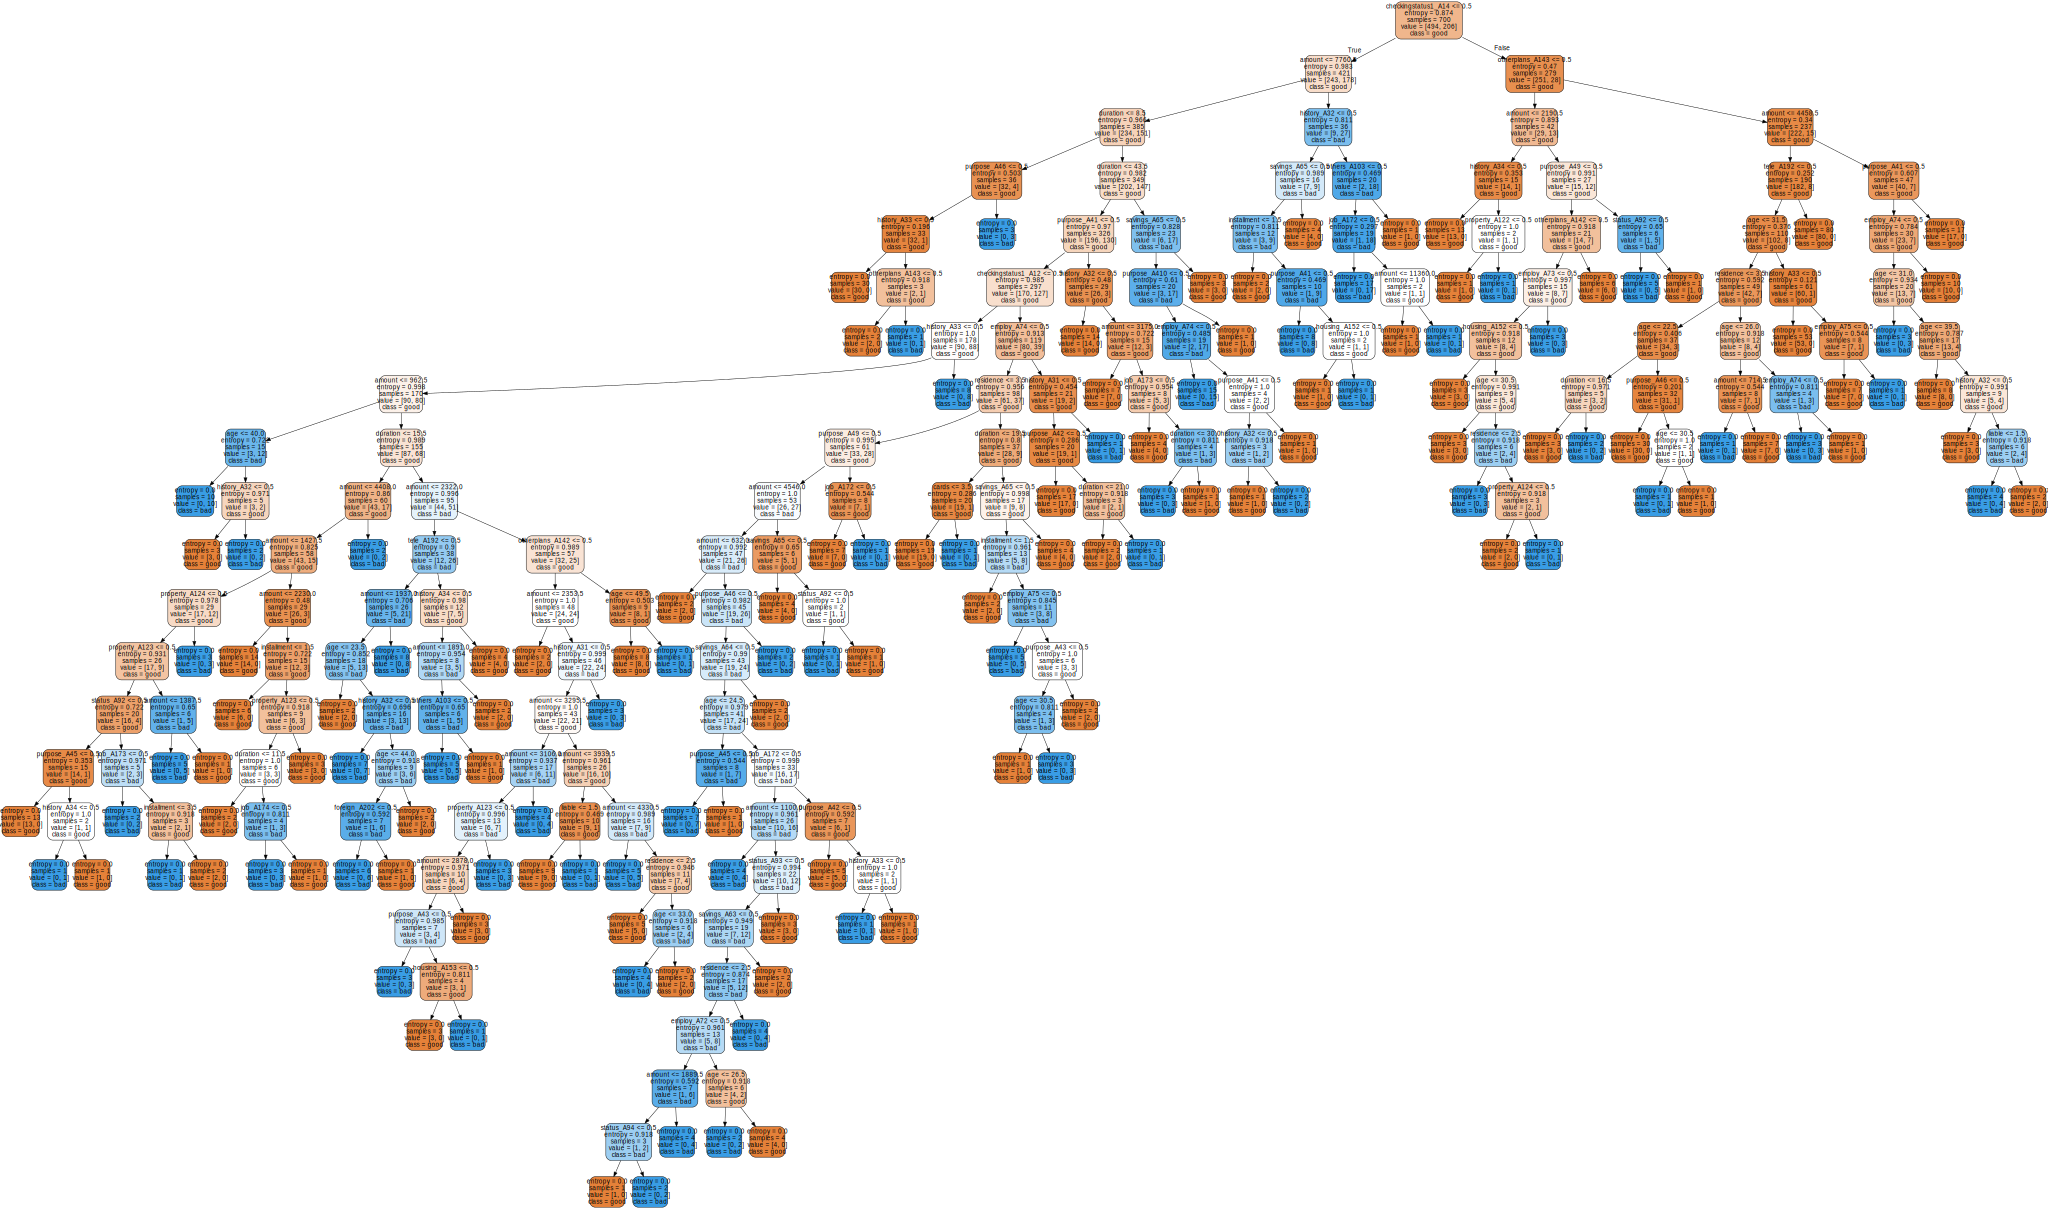

In [13]:
#https://stackoverflow.com/questions/28312534/graphvizs-executables-are-not-found-python-3-4     
#画一棵树
import graphviz
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= one_hot_data.columns 
                                ,class_names=["good","bad"] 
                                ,filled=True
                                ,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [7]:
#特征重要性
clf.feature_importances_

array([0.08670831, 0.14839092, 0.02403357, 0.02296993, 0.11135118,
       0.00936037, 0.02924039, 0.00965984, 0.        , 0.10954916,
       0.        , 0.04083848, 0.02472729, 0.01213093, 0.02886676,
       0.00485844, 0.0034999 , 0.        , 0.        , 0.01249953,
       0.02893097, 0.        , 0.01584926, 0.        , 0.00857061,
       0.00726547, 0.02842424, 0.00464852, 0.00642605, 0.03048417,
       0.00539086, 0.00699979, 0.00625732, 0.        , 0.00267262,
       0.01246549, 0.00343152, 0.02836273, 0.01630874, 0.01336962,
       0.03239476, 0.01737628, 0.        , 0.01225007, 0.00450193,
       0.00717455, 0.02175942, 0.        ])

In [9]:
[*zip(one_hot_data.columns ,clf.feature_importances_)]

[('duration', 0.08670830651790344),
 ('amount', 0.14839092108225257),
 ('installment', 0.02403357281331931),
 ('residence', 0.022969934395652685),
 ('age', 0.11135118493032865),
 ('cards', 0.009360367905223826),
 ('liable', 0.02924038816343928),
 ('checkingstatus1_A12', 0.009659837596762796),
 ('checkingstatus1_A13', 0.0),
 ('checkingstatus1_A14', 0.10954916442338702),
 ('history_A31', 0.0),
 ('history_A32', 0.04083848349577751),
 ('history_A33', 0.02472729146653003),
 ('history_A34', 0.012130928874291172),
 ('purpose_A41', 0.028866757694139412),
 ('purpose_A410', 0.004858441485085105),
 ('purpose_A42', 0.0034998954948204986),
 ('purpose_A43', 0.0),
 ('purpose_A44', 0.0),
 ('purpose_A45', 0.012499534027367731),
 ('purpose_A46', 0.02893097024361084),
 ('purpose_A48', 0.0),
 ('purpose_A49', 0.01584926409274092),
 ('savings_A62', 0.0),
 ('savings_A63', 0.008570606221029337),
 ('savings_A64', 0.007265470906902942),
 ('savings_A65', 0.028424242349912726),
 ('employ_A72', 0.00464851693566058

In [15]:
score_train=clf.score(xtrain,ytrain)
score_train

1.0

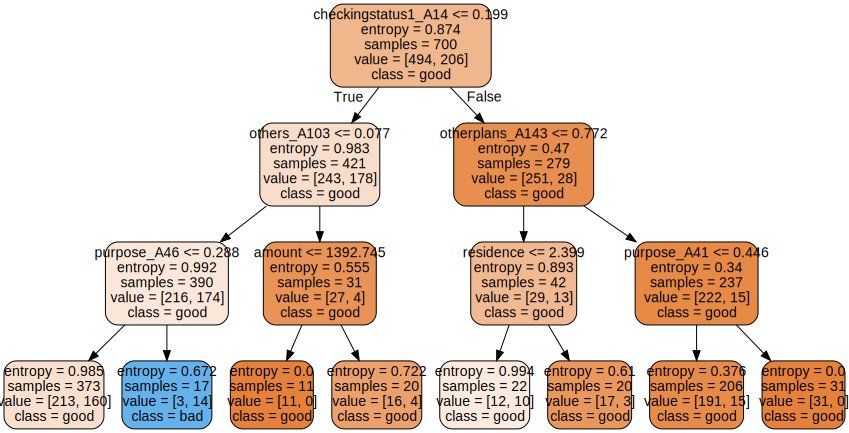

In [28]:
#剪枝
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=3
                                  ,min_samples_leaf=10
                                  #,min_samples_split=10
                                 )
clf = clf.fit(xtrain, ytrain)
dot_data = tree.export_graphviz(clf
                                ,feature_names= one_hot_data.columns 
                                ,class_names=["good","bad"] ,
                                filled=True
                                ,rounded=True
                               )
graph = graphviz.Source(dot_data)
graph

In [29]:
score_train=clf.score(xtrain,ytrain)
score_train

0.7214285714285714

In [30]:
score=clf.score(xtest,ytest)
score

0.67

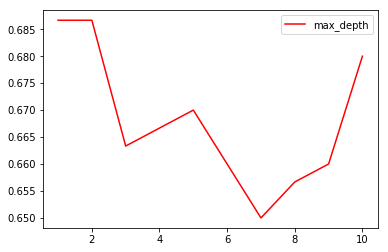

In [34]:
#超参数曲线
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                      ,criterion="entropy"
                                      ,random_state=30
                                         ,splitter="random"
                                        )
    clf = clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, one_hot_data, credit_data.iloc[:,0], cv=10)

array([0.6 , 0.66, 0.73, 0.65, 0.7 , 0.68, 0.63, 0.71, 0.65, 0.66])

In [36]:
[*range(1,10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [38]:
[range(1,10)]

[range(1, 10)]

# L5 Logistic regression

In [3]:
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
lr1=LR(penalty="l1",solver="liblinear",C=0.5,max_iter=1000)
lr2=LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [13]:
lr1=lr1.fit(one_hot_data,credit_data.iloc[:,0])
lr2=lr2.fit(one_hot_data,credit_data.iloc[:,0])

In [14]:
lr1.coef_

array([[ 2.61670080e-02,  1.15139107e-04,  2.78060795e-01,
         0.00000000e+00, -1.59111257e-02,  1.78620393e-01,
         7.71738788e-02, -3.27506055e-01, -6.90363013e-01,
        -1.61899556e+00,  2.91430975e-01, -8.49178896e-02,
        -1.90363082e-01, -7.87911641e-01, -1.16377785e+00,
        -1.69492486e-01, -3.48012955e-01, -6.05060752e-01,
         0.00000000e+00,  0.00000000e+00,  8.97771261e-02,
         0.00000000e+00, -2.43108972e-01, -4.20489415e-02,
        -1.09852196e-01, -7.31107252e-01, -7.50738513e-01,
         1.21107566e-01,  0.00000000e+00, -4.94998500e-01,
         0.00000000e+00,  0.00000000e+00, -4.41994326e-01,
        -8.14402149e-02,  6.08644923e-02, -6.43589071e-01,
         2.93835722e-02,  2.10474337e-03,  1.36590547e-01,
         0.00000000e+00, -5.14001539e-01, -3.13436940e-01,
         0.00000000e+00,  0.00000000e+00,  1.05249414e-03,
         0.00000000e+00, -2.26632686e-01, -5.95404160e-01]])

In [15]:
lr2.coef_

array([[ 2.67484899e-02,  1.15448801e-04,  3.04106095e-01,
         6.90405307e-03, -1.39007303e-02,  2.35887832e-01,
         2.02743606e-01, -2.86666735e-01, -7.26810892e-01,
        -1.54760708e+00,  3.70232203e-01, -2.10120154e-01,
        -3.92165814e-01, -9.45731115e-01, -1.16148871e+00,
        -5.18407160e-01, -4.28848583e-01, -6.39279897e-01,
        -9.33459571e-02,  2.43235115e-02,  1.85267377e-01,
        -4.07260707e-01, -3.70832509e-01, -2.12608889e-01,
        -3.19518947e-01, -8.80826641e-01, -8.15819596e-01,
         1.82571870e-01,  2.06994635e-02, -5.33481359e-01,
        -7.37725352e-02, -5.58666732e-02, -5.55605595e-01,
        -2.16779381e-01,  2.83089114e-01, -7.40636168e-01,
         2.05008845e-01,  1.52682949e-01,  4.67172972e-01,
        -3.27790559e-02, -5.71307039e-01, -3.86637689e-01,
        -3.29571876e-01,  3.87190664e-02,  6.33875633e-02,
         4.21974098e-02, -2.83004675e-01, -7.51309836e-01]])

In [18]:
(lr1.coef_ !=0).sum(axis=1)

array([37])

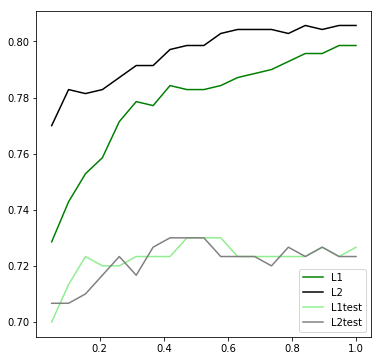

In [22]:
l1=[]
l2=[]
l1test = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(one_hot_data,credit_data.iloc[:,0],test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty="l1",solver="liblinear",C=i,max_iter=1000)
    lrl2 = LR(penalty="l2",solver="liblinear",C=i,max_iter=1000)
    lrl1 = lrl1.fit(Xtrain,Ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),Ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),Ytest))
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l1,l2,l1test,l2test]
color = ["green","black","lightgreen","gray"]
label = ["L1","L2","L1test","L2test"]
plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i]) 
plt.legend(loc=4) #图例的位置在哪里?4表示，右下角
plt.show()

In [27]:
#特征工程 embedded
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

LR_ = LR(solver="liblinear",C=0.5,random_state=420)
cross_val_score(LR_,one_hot_data,credit_data.iloc[:,0],cv=10).mean()

0.751

In [24]:
one_hot_data.shape

(1000, 48)

In [28]:
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(one_hot_data,credit_data.iloc[:,0])
X_embedded.shape

(1000, 20)

In [30]:
cross_val_score(LR_,X_embedded,credit_data.iloc[:,0],cv=10).mean()

0.736

0.74 2.01


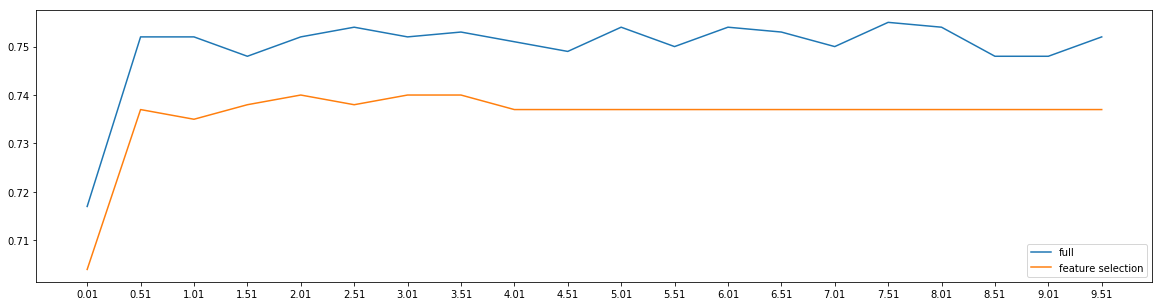

In [31]:
#调逻辑回归的类LR_，通过画C的学习曲线来实现:
fullx = []
fsx = []
C=np.arange(0.01,10.01,0.5)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,one_hot_data,credit_data.iloc[:,0],cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(one_hot_data,credit_data.iloc[:,0])
    fsx.append(cross_val_score(LR_,X_embedded,credit_data.iloc[:,0],cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.74 1.5649999999999988


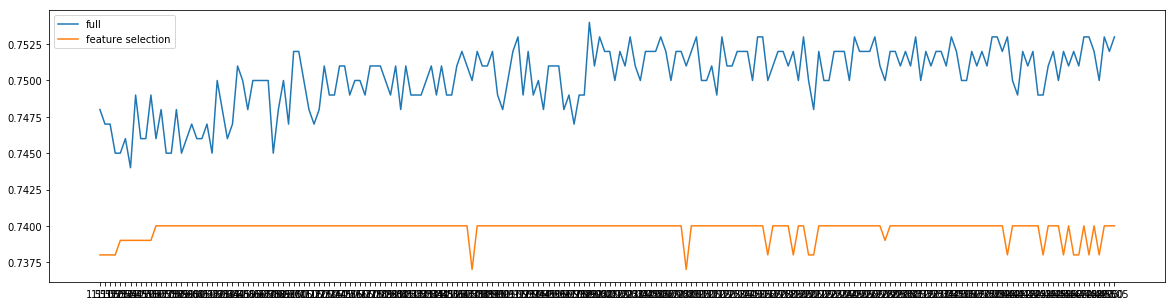

In [32]:
fullx = []
fsx = []
C=np.arange(1.51,2.51,0.005)
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,one_hot_data,credit_data.iloc[:,0],cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(one_hot_data,credit_data.iloc[:,0])
    fsx.append(cross_val_score(LR_,X_embedded,credit_data.iloc[:,0],cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()


In [33]:
#验证模型效果:降维之前
LR_ = LR(solver="liblinear",C=1.5649999999999988,random_state=420) 
cross_val_score(LR_,one_hot_data,credit_data.iloc[:,0],cv=10).mean()

0.746

In [35]:
#验证模型效果:降维之后
LR_ = LR(solver="liblinear",C=1.5649999999999988,random_state=420)
X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(one_hot_data,credit_data.iloc[:,0]) 
cross_val_score(LR_,X_embedded,credit_data.iloc[:,0],cv=10).mean()

0.74

In [36]:
X_embedded.shape

(1000, 19)